# A) API Zugriff im lokalen Netzwerk 

# A) Das sind die Inhalte:
## Sensor- Werte auslesen und speichern
1. request an das REST API senden und "return-object" analysieren
2. dictionary mit json.loads aus dem "return-object" erzeugen
3. dekodierte Sensor - Messwerte mit "print" ausgeben
4. Messwerte als .json file ablegen
5. Messwerte fortlaufend in einem .db file mitschreiben

# B) Das ist dein Arbeitsauftrag: 
## ->Arbeitsaufgabe 1: "Dummy - Werte speichern"

### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "b_nachname_dummy_source" - file darin ab. Der Source-Code soll nur die notwendigen Bestandteile enthalten, um das geforderte .json und .db file anzulegen. Bitte kommentiere den Source-Code und alle individuellen Anpassungen! Füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die individuell angepassten dummy - Werte in einem .json File "b_nachname_dummywerte.json"
3. speichere die individuell angepassten dummy - Werte in einer sqlite Datenbank "b_nachname_dummywerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 1 Nachname"

## ->Arbeitsaufgabe 2: "Sensor - Werte speichern"
Das Abfrageintervall ist eine Minute. Die Dauer der Aufzeichnung ist vor dem Start der Aufzeichnung
individuell mit dem Lehrer zu vereinbaren.

### TODO: *Ersetze die "dummy-Werte" durch echte Sensordaten. Speichere die Werte für Luftfeuchtigkeit, Temperatur und Helligkeit:*
### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "source" - file darin ab. Der Source-Code soll im Unterschied zu Arbeitsaufgabe 1 alle Code-Bestandteile von A1) bis A5) in ausgeführter Form beinhalten und zusätzlich die erforderlichen individuellen Anpassungen inkl. deiner Kommentare. Bitte füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die Sensor - Werte in einem .json File "b_nachname_sensorwerte.json"
3. speichere die Sensor - Werte in einer sqlite Datenbank "b_nachname_sensorwerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 2 Nachname"



 

# Input zu Arbeitsaufgabe 1 und 2
### ACHTUNG: Die dummy-Werte für Arbeitsaufgabe 1 müssen individuell z.B. mittels Zufallsgenerator erzeugt werden!
### A1) request an das REST API senden und "return-object" analysieren

In [70]:
import requests
import json
#Die Authentifizierung wird im lokalen Netzwerk noch nicht benötigt, aber im nächsten Schritt
#from requests.auth import HTTPBasicAuth


TODO: 1 Schritt: IP Adresse des Sensors identifizieren! Dazu das Programm "Advanced IP Scanner " installieren
um die IP - Adressen aller Computer im Netzwerk abzufragen. 
Um einen geeigente IP - Range festzulegen, cmd starten - eigene IP Adresse (am Kabel abfragen) und IP - 100 bis IP + 100 scannen. 
Das Gerät ist ein Raspberry Pi und sollte im NW anhand des Namens entsprechend erkannt werden. 

In [71]:
my_temp_data = 'http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_temperature'
my_hum_data = 'http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_relative_humidity'
my_lum_data = 'http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_luminance'
my_ultraviolet_data = 'http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_ultraviolet'



In [72]:
hum_value = requests.get(my_hum_data)
temp_value = requests.get(my_temp_data)
ultraviolet_value = requests.get(my_ultraviolet_data)
lum_value = requests.get(my_lum_data)


# Response [200] = OK
print(hum_value)
print(temp_value)
print(lum_value)
print(ultraviolet_value)


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [73]:
type(hum_value)
type(temp_value)

requests.models.Response

In [74]:
#dir(hum_value)

In [75]:
my_hum_content=hum_value.content
my_temp_content=temp_value.content

temp_value.content

b'{"link":"http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_temperature","state":"26.2 \xc2\xb0C","stateDescription":{"pattern":"%.1f %unit%","readOnly":true,"options":[]},"editable":true,"type":"Number:Temperature","name":"ZWave_Node_005_Sensor_temperature","label":"Sensor (temperature)","category":"Temperature","tags":["Point"],"groupNames":[]}'

In [76]:
#my_content=hum_value.content


In [77]:
print(type(my_hum_content))
print(type(my_temp_content))

<class 'bytes'>
<class 'bytes'>


### A2) dictionary mit json.loads aus dem "return-object" erzeugen

In [78]:
# json.loads requires the decoded bytestring (which is a string) as argument and returns a python dictionary
# .decode togethe with json.loads is optional
print(type(json.loads(my_hum_content.decode("utf-8"))))
print(type(json.loads(my_temp_content.decode("utf-8"))))
hum = json.loads(my_hum_content.decode("utf-8"))
temp = json.loads(my_temp_content.decode("utf-8"))

<class 'dict'>
<class 'dict'>


### A3) dekodierte Sensor - Messwerte mit "print" ausgeben

In [79]:
# The result - bytestring can be decoded and printed directly as a string without using json.loads , 
# however if you pass it as an argument into the "json-loads" function you can create a dictionary
print(type(my_hum_content.decode()))
print(my_hum_content.decode())
print(my_temp_content.decode())

<class 'str'>
{"link":"http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_relative_humidity","state":"35","stateDescription":{"pattern":"%.1f","readOnly":true,"options":[]},"editable":true,"type":"Number","name":"ZWave_Node_005_Sensor_relative_humidity","label":"Sensor (relative humidity)","category":"Humidity","tags":["Point"],"groupNames":[]}
{"link":"http://192.168.1.100:8080/rest/items/ZWave_Node_005_Sensor_temperature","state":"26.2 °C","stateDescription":{"pattern":"%.1f %unit%","readOnly":true,"options":[]},"editable":true,"type":"Number:Temperature","name":"ZWave_Node_005_Sensor_temperature","label":"Sensor (temperature)","category":"Temperature","tags":["Point"],"groupNames":[]}


### A4) Input Arbeitsaufgabe 1/ Messwerte als .json file speichern

https://docs.python.org/3/library/json.html
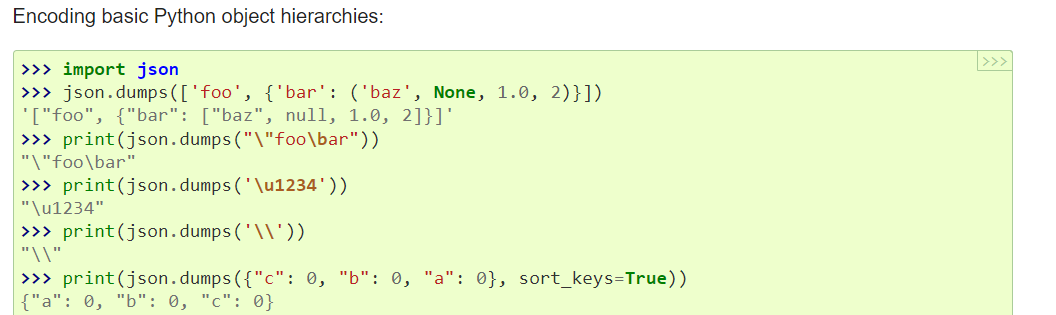

In [80]:
# in order to store the values as a json file, you might create and open a file, 
# continuously get the current sensor readings and finally store them in the json - file
# the code - snippet doesn't meet the requirements of the assignment in terms of time- interval, 
# sensor - readings, etc.

import time
import pandas as pd
my_values_df = pd.DataFrame(data=None,columns=['timestamp','temperature','humidity','luminance','ultraviolet'])
my_timestamp = round(time.time())
for my_counter in range(10):
    time.sleep(60)
    my_timestamp = round(time.time())
    print(my_timestamp)
    
    hum_value = requests.get(my_hum_data)
    temp_value = requests.get(my_temp_data)
    ultraviolet_value = requests.get(my_ultraviolet_data)
    lum_value = requests.get(my_lum_data)

    

    hum = json.loads(hum_value.content)
    temp = json.loads(temp_value.content)
    lum = json.loads(lum_value.content)
    ultra = json.loads(ultraviolet_value.content)

    # Daten auslesen
    act_temp = temp['state']
    act_hum = hum['state']
    act_lum = lum['state']
    act_ult = ultra['state']
    # °C von temperature entfernen
    act_temp = act_temp.replace('°C', '')

    print(act_hum)
    print(act_temp)
    input_values = [my_timestamp,act_temp,act_hum,act_lum,act_ult] 
    my_values_df.loc[my_counter]=input_values

filename = "a_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)
    

1685691246
35
26.2 
1685691306
35
26.3 
1685691367
35
26.3 
1685691427
35
26.3 
1685691487
35
26.3 
1685691548
35
26.3 
1685691608
35
26.4 
1685691669
35
26.4 
1685691729
35
26.4 
1685691789
35
26.4 


In [81]:
#retrieve values from .json file via 
pd.read_json(filename)

,timestamp,temperature,humidity,luminance,ultraviolet
0,2023-06-02 07:34:06,26.2,35,10,0
1,2023-06-02 07:35:06,26.3,35,8,0
2,2023-06-02 07:36:07,26.3,35,10,0
3,2023-06-02 07:37:07,26.3,35,10,0
4,2023-06-02 07:38:07,26.3,35,10,0
5,2023-06-02 07:39:08,26.3,35,10,0
6,2023-06-02 07:40:08,26.4,35,10,0
7,2023-06-02 07:41:09,26.4,35,10,0
8,2023-06-02 07:42:09,26.4,35,10,0
9,2023-06-02 07:43:09,26.4,35,10,0


### A5) Input Arbeitsaufgabe 1/ Messwerte fortlaufend in einem .db file mitschreiben

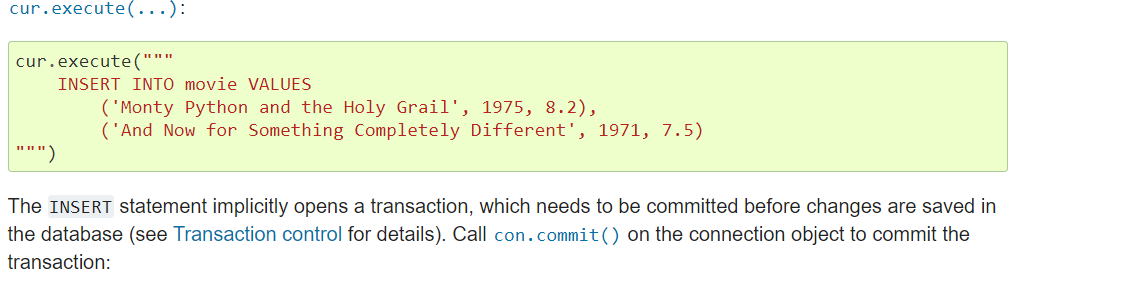

In [82]:
#!pip install sqlite3
import sqlite3

#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'a_sensor_values.db' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
cur.execute('''DROP TABLE IF EXISTS sensor_values''')
cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC,temperature NUMERIC, humidity NUMERIC, luminance NUMERIC, ultraviolet NUMERIC);''')

for my_counter in range(10):
    time.sleep(60)
    my_timestamp = round(time.time())
    print(my_timestamp)

    hum_value = requests.get(my_hum_data)
    temp_value = requests.get(my_temp_data)
    ultraviolet_value = requests.get(my_ultraviolet_data)
    lum_value = requests.get(my_lum_data)

    act_temp = act_temp.replace('°C', '')

    hum = json.loads(hum_value.content)
    temp = json.loads(temp_value.content)
    lum = json.loads(lum_value.content)
    ultra = json.loads(ultraviolet_value.content)

    # Daten auslesen
    act_temp = temp['state']
    act_hum = hum['state']
    act_lum = lum['state']
    act_ult = ultra['state']
    # °C von temperature entfernen
    act_temp = act_temp.replace('°C', '')
# CREATE INSERT STATEMENT
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum}, {act_lum}, {act_ult})"
    print(execution_string)
    cur.execute(execution_string)
    conn.commit()

a_sensor_values.db
1685691850
INSERT INTO sensor_values VALUES (1685691850, 26.4 , 35, 10, 0)
1685691910
INSERT INTO sensor_values VALUES (1685691910, 26.4 , 35, 10, 0)
1685691970
INSERT INTO sensor_values VALUES (1685691970, 26.4 , 35, 10, 0)
1685692030
INSERT INTO sensor_values VALUES (1685692030, 26.4 , 35, 10, 0)
1685692091
INSERT INTO sensor_values VALUES (1685692091, 26.4 , 35, 10, 0)
1685692151
INSERT INTO sensor_values VALUES (1685692151, 26.5 , 35, 10, 0)
1685692212
INSERT INTO sensor_values VALUES (1685692212, 26.5 , 36, 743, 0)
1685692272
INSERT INTO sensor_values VALUES (1685692272, 26.4 , 35, 743, 0)
1685692333
INSERT INTO sensor_values VALUES (1685692333, 26.3 , 35, 723, 0)
1685692393
INSERT INTO sensor_values VALUES (1685692393, 26.2 , 35, 678, 0)


In [83]:
# fetch values directly from db cursor
cur.execute("SELECT * FROM sensor_values")
print(cur.fetchall())

[(1685691850, 26.4, 35, 10, 0), (1685691910, 26.4, 35, 10, 0), (1685691970, 26.4, 35, 10, 0), (1685692030, 26.4, 35, 10, 0), (1685692091, 26.4, 35, 10, 0), (1685692151, 26.5, 35, 10, 0), (1685692212, 26.5, 36, 743, 0), (1685692272, 26.4, 35, 743, 0), (1685692333, 26.3, 35, 723, 0), (1685692393, 26.2, 35, 678, 0)]


In [84]:
# retrieve values via pd library from local database
pd.read_sql("SELECT * FROM sensor_values;", conn)

,timestamp,temperature,humidity,luminance,ultraviolet
0,1685691850,26.4,35,10,0
1,1685691910,26.4,35,10,0
2,1685691970,26.4,35,10,0
3,1685692030,26.4,35,10,0
4,1685692091,26.4,35,10,0
5,1685692151,26.5,35,10,0
6,1685692212,26.5,36,743,0
7,1685692272,26.4,35,743,0
8,1685692333,26.3,35,723,0
9,1685692393,26.2,35,678,0


timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 0, dtype: float64
0:00:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 1, dtype: float64
0:01:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 2, dtype: float64
0:02:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 3, dtype: float64
0:03:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 4, dtype: float64
0:04:01
timestamp      1.685692e+09
temperature    2.650000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00


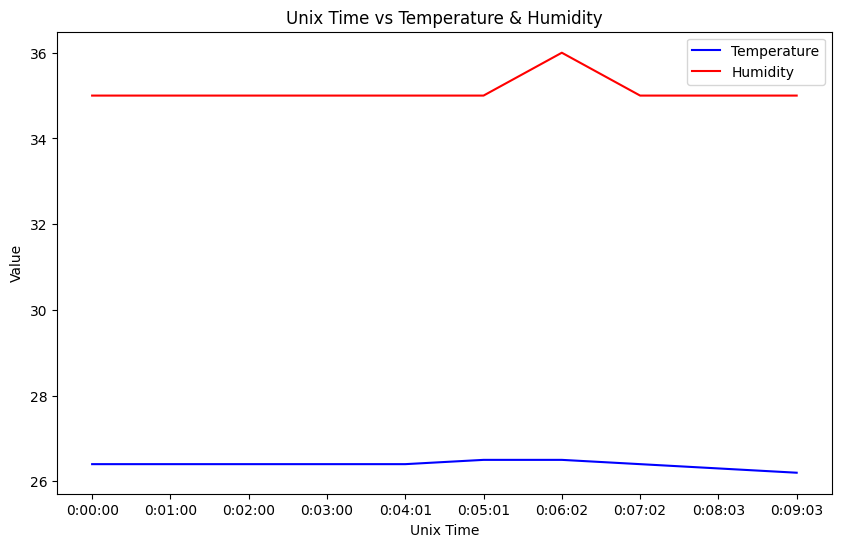

In [85]:
import matplotlib.pyplot as plt
import datetime
plot_df=pd.read_sql("SELECT * FROM sensor_values;", conn)

timestamps=[]
for i,row in plot_df.iterrows():
   print(row)
   first_time= plot_df.iloc[0]['timestamp']
   second_time= plot_df.iloc[i]['timestamp']  
   duration =  second_time - first_time
   calc_seconds=str(datetime.timedelta(seconds=duration))
   print(calc_seconds)
   timestamps.append(calc_seconds)


# Create the chart

plt.figure(figsize=(10, 6))
plt.plot(timestamps,plot_df['temperature'], 'b', label='Temperature')
plt.plot(timestamps,plot_df['humidity'], 'r', label='Humidity')

plt.xlabel('Unix Time')
plt.ylabel('Value')
plt.title('Unix Time vs Temperature & Humidity')
plt.legend(loc='upper right')

plt.show()

timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 0, dtype: float64
0:00:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 1, dtype: float64
0:01:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 2, dtype: float64
0:02:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 3, dtype: float64
0:03:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 4, dtype: float64
0:04:01
timestamp      1.685692e+09
temperature    2.650000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00


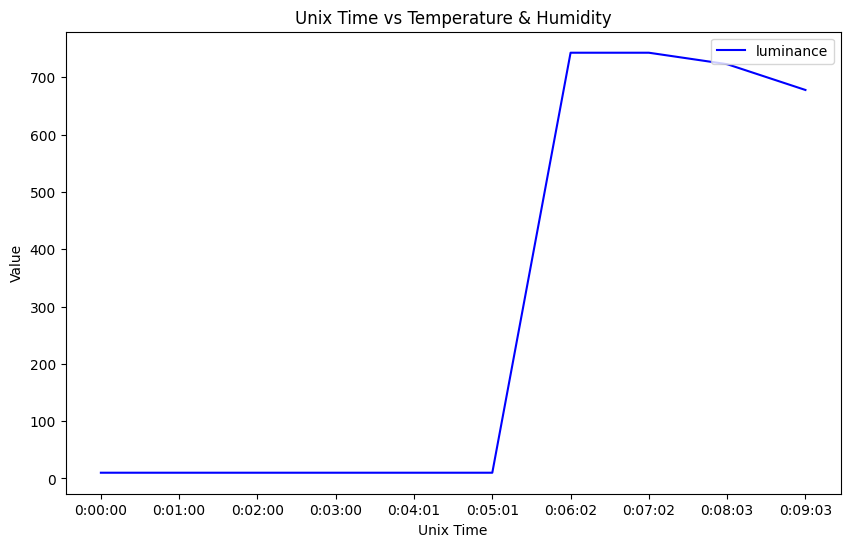

In [86]:
import matplotlib.pyplot as plt
import datetime
plot_df=pd.read_sql("SELECT * FROM sensor_values;", conn)

timestamps=[]
for i,row in plot_df.iterrows():
   print(row)
   first_time= plot_df.iloc[0]['timestamp']
   second_time= plot_df.iloc[i]['timestamp']  
   duration =  second_time - first_time
   calc_seconds=str(datetime.timedelta(seconds=duration))
   print(calc_seconds)
   timestamps.append(calc_seconds)


# Create the chart

plt.figure(figsize=(10, 6))
plt.plot(timestamps,plot_df['luminance'], 'b', label='luminance')


plt.xlabel('Unix Time')
plt.ylabel('Value')
plt.title('Unix Time vs Temperature & Humidity')
plt.legend(loc='upper right')

plt.show()

timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 0, dtype: float64
0:00:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 1, dtype: float64
0:01:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 2, dtype: float64
0:02:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 3, dtype: float64
0:03:00
timestamp      1.685692e+09
temperature    2.640000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00
Name: 4, dtype: float64
0:04:01
timestamp      1.685692e+09
temperature    2.650000e+01
humidity       3.500000e+01
luminance      1.000000e+01
ultraviolet    0.000000e+00


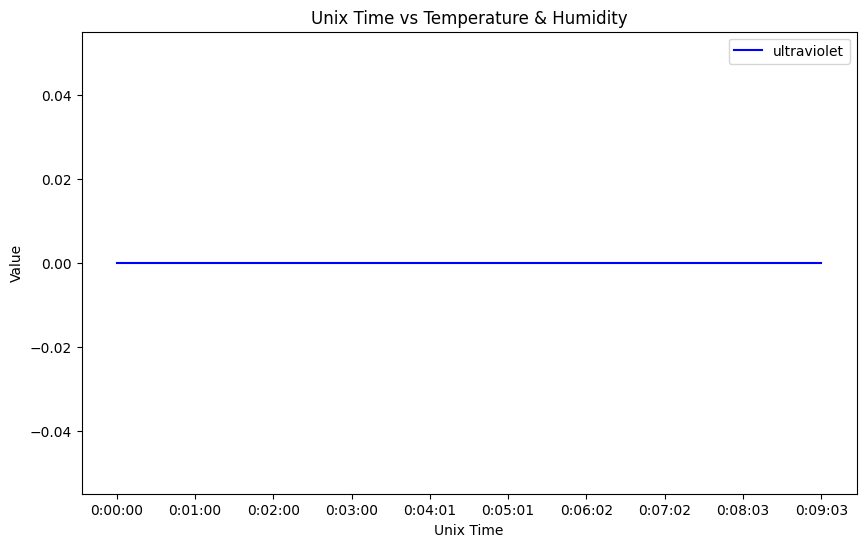

In [87]:
import matplotlib.pyplot as plt
import datetime
plot_df=pd.read_sql("SELECT * FROM sensor_values;", conn)

timestamps=[]
for i,row in plot_df.iterrows():
   print(row)
   first_time= plot_df.iloc[0]['timestamp']
   second_time= plot_df.iloc[i]['timestamp']  
   duration =  second_time - first_time
   calc_seconds=str(datetime.timedelta(seconds=duration))
   print(calc_seconds)
   timestamps.append(calc_seconds)


# Create the chart

plt.figure(figsize=(10, 6))
plt.plot(timestamps,plot_df['ultraviolet'], 'b', label='ultraviolet')


plt.xlabel('Unix Time')
plt.ylabel('Value')
plt.title('Unix Time vs Temperature & Humidity')
plt.legend(loc='upper right')

plt.show()